### Tree Based Methods

Preliminary: 
Install graphviz if graphviz have not been installed:
1. To install download exe at https://www2.graphviz.org/Packages/development/windows/10/cmake/Release/x64/

 When installing, select to include PATH for all users.
 
2. At the anaconda prompt type: pip install graphviz

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, cross_val_score
from io import StringIO  
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report

import pydot ### need to install : conda install pydot
from IPython.display import Image

%matplotlib inline
plt.style.use('seaborn-white')

In [2]:
df = pd.read_csv('Data/Hitters.csv').dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  263 non-null    object 
 1   AtBat       263 non-null    int64  
 2   Hits        263 non-null    int64  
 3   HmRun       263 non-null    int64  
 4   Runs        263 non-null    int64  
 5   RBI         263 non-null    int64  
 6   Walks       263 non-null    int64  
 7   Years       263 non-null    int64  
 8   CAtBat      263 non-null    int64  
 9   CHits       263 non-null    int64  
 10  CHmRun      263 non-null    int64  
 11  CRuns       263 non-null    int64  
 12  CRBI        263 non-null    int64  
 13  CWalks      263 non-null    int64  
 14  League      263 non-null    object 
 15  Division    263 non-null    object 
 16  PutOuts     263 non-null    int64  
 17  Assists     263 non-null    int64  
 18  Errors      263 non-null    int64  
 19  Salary      263 non-null    f

### Graph the data

In [3]:
X = df[['Years', 'Hits']].to_numpy()
y = np.log(df.Salary.to_numpy())
df.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N
5,-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,...,501,336,194,A,W,282,421,25,750.0,A


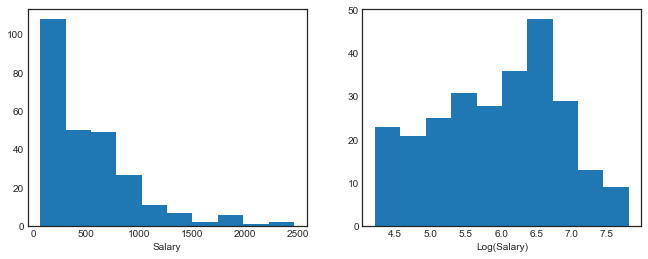

In [4]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(11,4))
ax1.hist(df.Salary.to_numpy())
ax1.set_xlabel('Salary')
ax2.hist(y)
ax2.set_xlabel('Log(Salary)');

### Decision Tree Regression

In [5]:
regr = DecisionTreeRegressor(max_leaf_nodes=3)
regr.fit(X, y)


DecisionTreeRegressor(max_leaf_nodes=3)

### Plot the Tree and graph

[Text(111.6, 271.8, 'X[0] <= 4.5\nmse = 0.788\nsamples = 263\nvalue = 5.927'),
 Text(55.8, 163.08, 'mse = 0.471\nsamples = 90\nvalue = 5.107'),
 Text(167.39999999999998, 163.08, 'X[1] <= 117.5\nmse = 0.42\nsamples = 173\nvalue = 6.354'),
 Text(111.6, 54.360000000000014, 'mse = 0.312\nsamples = 90\nvalue = 5.998'),
 Text(223.2, 54.360000000000014, 'mse = 0.252\nsamples = 83\nvalue = 6.74')]

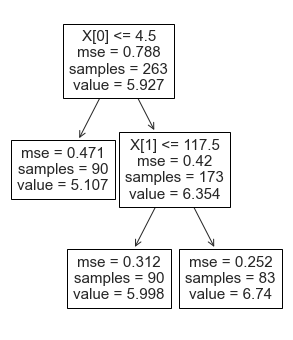

In [6]:
from sklearn import tree
plt.figure(figsize=[5,6]) #control size of figure in inches
tree.plot_tree(regr) 

Text-based tree can also be created ... see below

In [7]:
from sklearn.tree import export_text
r = export_text(regr, feature_names=['years','hits'])
print(r)

|--- years <= 4.50
|   |--- value: [5.11]
|--- years >  4.50
|   |--- hits <= 117.50
|   |   |--- value: [6.00]
|   |--- hits >  117.50
|   |   |--- value: [6.74]



### The following requires Graphviz installed, or you can skip

In [8]:
import graphviz 
dot_data = tree.export_graphviz(regr, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("sal") 
#generates sal.pdf file

'sal.pdf'

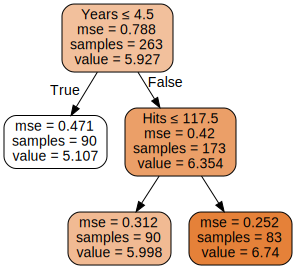

In [9]:
from sklearn import tree
dot_data = tree.export_graphviz(regr, out_file=None,
                      feature_names=['Years','Hits'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

### Question
1. What does mse, samples, value mean in the decision tree graph printed above?
2. What are the predictors and response variable in this example?



### Answer
1. mse is used in the regression tree to decide at which node to branch  
In the regression tree, the mse of each node will be compared, and the smallest mse will be selected for branching  
sample is the number of remaining samples that meet the branch conditions after each branch  
For example, in the branch of the first node, there are 90 players with a seniority of less than 4.5 years, and 173 players with a seniority of more than 4.5 years.  
The value in each leaf is the mean of the response for the observations that fall there.  
For example, in the branch of the first node, the average salary of players less than 4.5 years old is 5.107  
2.years and hits are predictors  
salary is response variable  

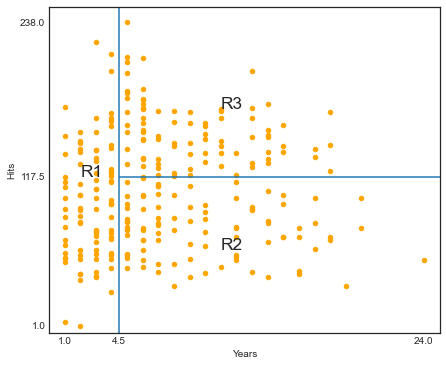

In [10]:
df.plot('Years', 'Hits', kind='scatter', color='orange', figsize=(7,6))
plt.xlim(0,25)
plt.ylim(ymin=-5)
plt.xticks([1, 4.5, 24])
plt.yticks([1, 117.5, 238])
plt.vlines(4.5, ymin=-5, ymax=250)
plt.hlines(117.5, xmin=4.5, xmax=25)
plt.annotate('R1', xy=(2,117.5), fontsize='xx-large')
plt.annotate('R2', xy=(11,60), fontsize='xx-large')
plt.annotate('R3', xy=(11,170), fontsize='xx-large');

Text(0, 0.5, 'y')

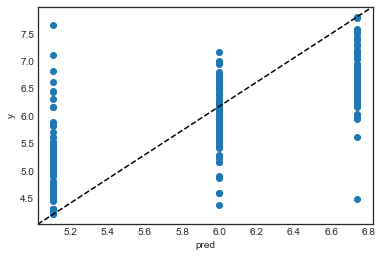

In [11]:
pred = regr.predict(X)
plt.scatter(pred, y, label='Sal')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)#draws the dotted line
plt.xlabel('pred')
plt.ylabel('y')

In [13]:
mean_squared_error(y, pred)

0.3472621585610648

In [14]:
#check invidivual prediction, what are the values used as input and predicted?
prd = regr.predict([[ 14,  81]])
print(np.exp(prd))

[402.77570648]


### Question
1. For the above code, what are the values used as input?
1. How accurate is the prediction? What is the actual value?
1. Which player is that?
1. What is the prediction value for play with 2 years experience and 120 hits?


### Answer
1. Using years=14 and hits=81 as the input  
2. actual value=475.The difference between the predicted value and the actual value is 72.2243,Predicted values are not very accurate
3. Alan Ashby  
4. prediction value for play with 2 years experience and 120 hits is 165.1393406

In [29]:
df[:1]

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N


In [30]:
prd1 = regr.predict([[2, 120]])
print(np.exp(prd1))

[165.1393406]


### Classification Tree 

In [54]:
df2 = pd.read_csv('Data/Heart.csv').drop('Unnamed: 0', axis=1).dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        297 non-null    int64  
 1   Sex        297 non-null    int64  
 2   ChestPain  297 non-null    object 
 3   RestBP     297 non-null    int64  
 4   Chol       297 non-null    int64  
 5   Fbs        297 non-null    int64  
 6   RestECG    297 non-null    int64  
 7   MaxHR      297 non-null    int64  
 8   ExAng      297 non-null    int64  
 9   Oldpeak    297 non-null    float64
 10  Slope      297 non-null    int64  
 11  Ca         297 non-null    float64
 12  Thal       297 non-null    object 
 13  AHD        297 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 34.8+ KB


In [60]:
df2.ChestPain = pd.factorize(df2.ChestPain)[0]
df2.Thal = pd.factorize(df2.Thal)[0]
X2 = df2.drop('AHD', axis=1)
y2 = pd.factorize(df2.AHD)[0]
X2.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
0,63,1,0,145,233,1,2,150,0,2.3,3,0.0,0
1,67,1,1,160,286,0,2,108,1,1.5,2,3.0,1
2,67,1,1,120,229,0,2,129,1,2.6,2,2.0,2
3,37,1,2,130,250,0,0,187,0,3.5,3,0.0,1
4,41,0,3,130,204,0,2,172,0,1.4,1,0.0,1


In [61]:
clf = DecisionTreeClassifier(max_depth=None, max_leaf_nodes=6, max_features=3)
clf.fit(X2,y2)
# score returns the accuracy of the prediction: the percentage of correct
# classifications if it's a two-class classification problem
clf.score(X2,y2)

0.7946127946127947

In [62]:
#print the classification report of the training data (in this case)
y2pred=clf.predict(X2)
print(classification_report(y2, y2pred))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       160
           1       0.82      0.71      0.76       137

    accuracy                           0.79       297
   macro avg       0.80      0.79      0.79       297
weighted avg       0.80      0.79      0.79       297



In [63]:
#print(confusion_matrix(y2, y2pred))
#fancy way below
cm = pd.DataFrame(confusion_matrix(y2, y2pred).T, index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
cm

True,No,Yes
Predicted,,
No,139,40
Yes,21,97


### Graph Classification tree

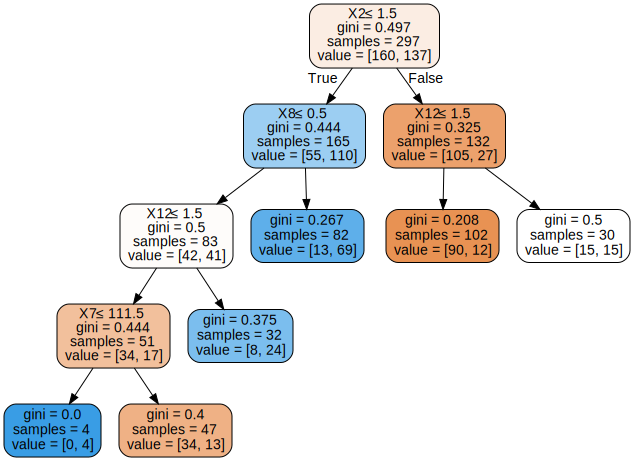

In [64]:
#requires Graphviz
from sklearn import tree
dot_data = tree.export_graphviz(clf, out_file=None,
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

### Question
1. What does samples, value, class means in the decision tree graph printed above?
2. What are the predictors and response variable in this example?

### Answer
1. sample is the number of remaining samples that meet the branch conditions after each branch  
For example, in the branch of the first node, there are 165 observation with ChestPain less than 1.5, and 158 observation with ChestPain more than 1.5.  
value represents the number of samples belonging to each category of the node
For example, in the branch of the first node,the sample contains 137 no and 160 yes.  


2. Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,hal are predictors.  
  AHD is response variable

## Question
Create a decision tree regressor for the data Carseats.csv, the data consist of  simulated data set containing sales of child car seats at 400 different stores. You may have to clean up the data abit, and map the 'Yes','No' into 0 and 1. You can use this command, for example:
```
df.Urban = df3.Urban.map({'No':0, 'Yes':1})
```

Separate the data into training and test. You also need to factorize ShelveLoc. 
1. Print out the MSE value for both training and test dataset. 
1. Print out the regression decision tree graph. 
1. Print out also the scatter plot of Y and Predicted Y.


In [69]:
df3 = pd.read_csv('Data/Carseats.csv').drop('Unnamed: 0', axis=1).dropna()
df3.Urban = df3.Urban.map({'No':0, 'Yes':1})
df3.US = df3.US.map({'No':0, 'Yes':1})
df3.ShelveLoc = pd.factorize(df3.ShelveLoc)[0]
df3.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [70]:
from sklearn.model_selection import train_test_split
X = df3.drop('Sales', axis=1).to_numpy()
y = df3.Sales.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
regr = DecisionTreeRegressor(max_leaf_nodes=6)
regr.fit(X_train,y_train)

DecisionTreeRegressor(max_leaf_nodes=6)

In [89]:
#Q1
train_pred = regr.predict(X_train)
test_pred = regr.predict(X_test)

print('training set mse =', mean_squared_error(y_train, train_pred))
print('testing set mse =', mean_squared_error(y_test, test_pred))

training set mse = 4.142629600720028
testing set mse = 5.673256413288935


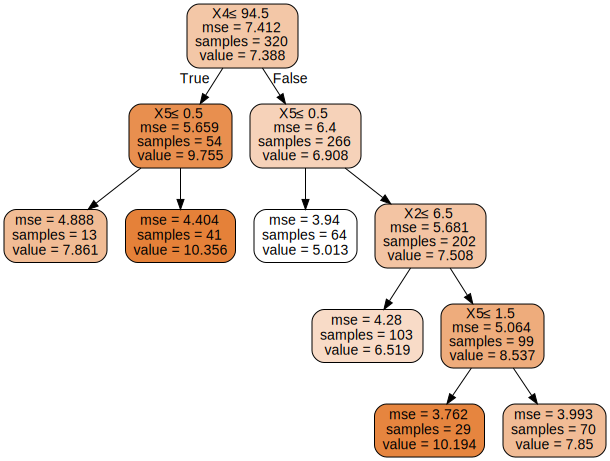

In [90]:
#Q2
from sklearn import tree
dot_data = tree.export_graphviz(regr, out_file=None,
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

Text(0, 0.5, 'y')

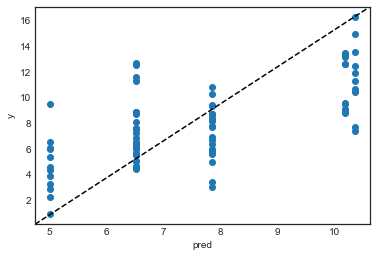

In [91]:
#Q3
plt.scatter(test_pred, y_test, label='Sal')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)#draws the dotted line
plt.xlabel('pred')
plt.ylabel('y')

## Question
Using the same Carseats.csv data set, convert the problem into a Classification problem. Create a new column that maps the sales to High the value is greater than 8. You can use this:

```
f3['High'] = df2.Sales.map(lambda x: 1 if x>8 else 0)
```
Map columsn Urban and US into 1 or 0 as well. Create a train and test split on the dataset. Run it through a decision tree classifier.

1. Print the classification report
1. Print confusion matrix
1. Print the decision tree graph



In [105]:
df4 = pd.read_csv('Data/Carseats.csv').drop('Unnamed: 0', axis=1).dropna()

df4.Urban = df4.Urban.map({'No': 0, 'Yes': 1})
df4.US = df4.US.map({'No': 0, 'Yes': 1})
df4.ShelveLoc = pd.factorize(df3.ShelveLoc)[0]

df4['High'] = df4.Sales.map(lambda x: 1 if x>8 else 0)

df4.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0


In [106]:
from sklearn.model_selection import train_test_split
X = df4.drop('High', axis=1)
y = df4.High

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [122]:
clf = DecisionTreeClassifier(max_depth=None, max_leaf_nodes=6, max_features=3)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_features=3, max_leaf_nodes=6)

In [123]:
#Q1
#classification report of the training data 
y_train_pred=clf.predict(X_train)
print(classification_report(y_train, y_train_pred))

#classification report of the testing data
y_test_pred=clf.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       193
           1       1.00      0.92      0.96       127

    accuracy                           0.97       320
   macro avg       0.98      0.96      0.97       320
weighted avg       0.97      0.97      0.97       320

              precision    recall  f1-score   support

           0       0.91      1.00      0.96        43
           1       1.00      0.89      0.94        37

    accuracy                           0.95        80
   macro avg       0.96      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80



In [125]:
#Q2
#confusion matrix of the training data 
train_cm = pd.DataFrame(confusion_matrix(y_train, y_train_pred).T, index=['low', 'High'], columns=['low', 'High'])
train_cm.index.name = 'Predicted'
train_cm.columns.name = 'True'
train_cm

True,low,High
Predicted,,
low,193,10
High,0,117


In [128]:
#Q2
#confusion matrix of the testing data 
test_cm = pd.DataFrame(confusion_matrix(y_test, y_test_pred).T, index=['low', 'High'], columns=['low', 'High'])
test_cm.index.name = 'Predicted'
test_cm.columns.name = 'True'
test_cm

True,low,High
Predicted,,
low,43,4
High,0,33


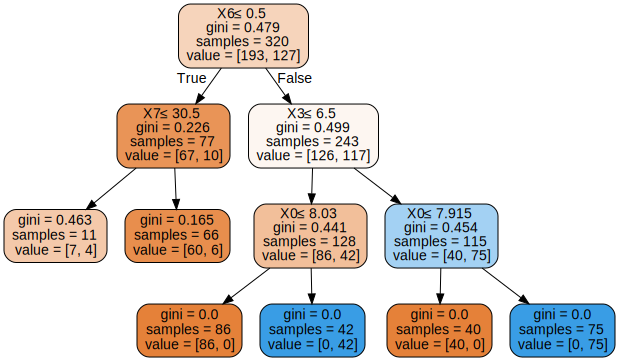

In [129]:
#Q3
from sklearn import tree
dot_data = tree.export_graphviz(clf, out_file=None,
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

### Random Tree Classifier

Digits Classification demonstration

In [3]:
#source: Jake VanderPlas
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

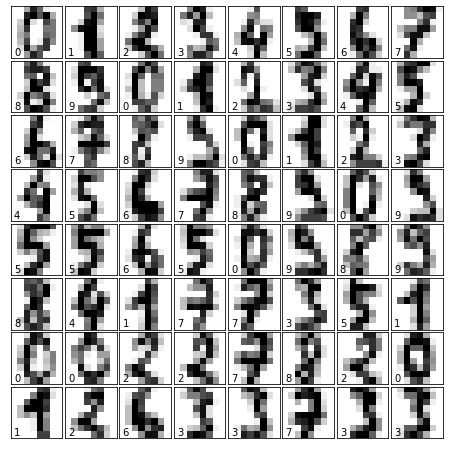

In [14]:
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))


In [8]:
from sklearn.model_selection  import train_test_split
from sklearn.ensemble import RandomForestClassifier

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,
                                                random_state=0)
model = RandomForestClassifier(n_estimators=1000) # this is the number of trees 
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

In [9]:
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.98      0.95      0.97        44
           2       0.95      1.00      0.98        42
           3       0.98      0.98      0.98        45
           4       0.97      1.00      0.99        37
           5       0.98      0.96      0.97        49
           6       1.00      1.00      1.00        52
           7       1.00      0.96      0.98        50
           8       0.94      0.98      0.96        46
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



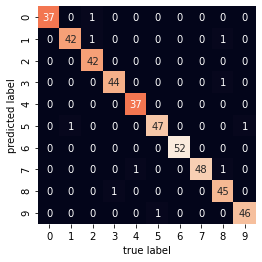

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');